<a href="https://colab.research.google.com/github/Nahaeran/ai-for-ml-exercise/blob/main/week7/221013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task1
<hr>

In [1]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

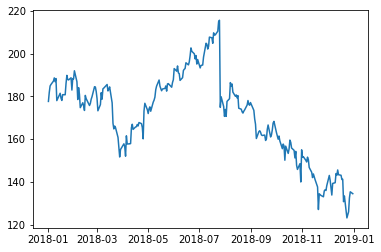

In [3]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

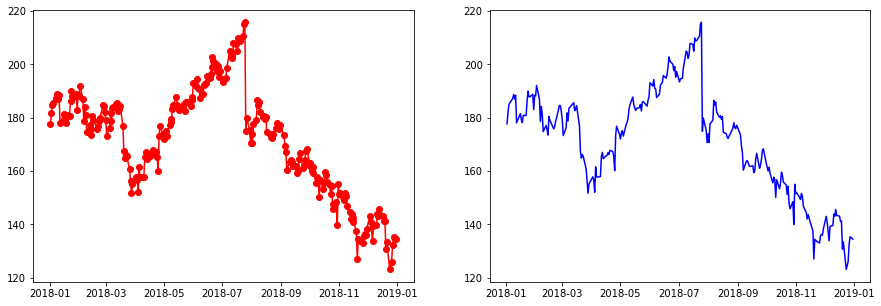

In [15]:
fig1,axes1 = plt.subplots(1,2 ,figsize=(15,5))

axes1[0].plot(fb.index, fb.open, 'o-r')
axes1[1].plot(fb.index, fb.open, 'b')

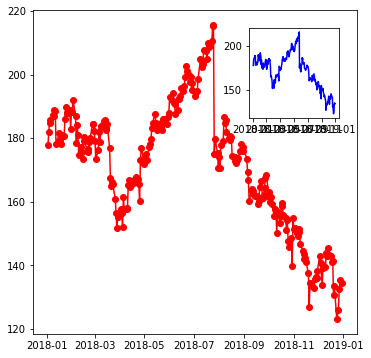

In [20]:
fig2 = plt.figure(figsize=(5,5))

outside = fig2.add_axes([0.1, 0.1, 0.9, 0.9])
outside.plot(fb.index, fb.open, 'o-r')
inside = fig2.add_axes([0.7, 0.7, 0.25, 0.25])
inside.plot(fb.index, fb.open, 'b')

***Scatter plot***

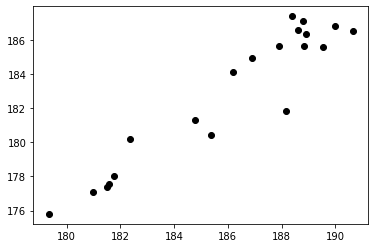

In [25]:
plt.plot('high','low','ok',data=fb.head(20))

***Histograms***

(array([1.500e+01, 4.900e+01, 1.380e+02, 3.070e+02, 4.430e+02, 6.940e+02,
        8.390e+02, 1.014e+03, 1.316e+03, 7.980e+02, 5.190e+02, 2.880e+02,
        1.750e+02, 1.050e+02, 7.000e+01, 2.200e+01, 8.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00]),
 array([-1.26 , -0.942, -0.624, -0.306,  0.012,  0.33 ,  0.648,  0.966,
         1.284,  1.602,  1.92 ,  2.238,  2.556,  2.874,  3.192,  3.51 ,
         3.828,  4.146,  4.464,  4.782,  5.1  ]),
 <a list of 20 Patch objects>)

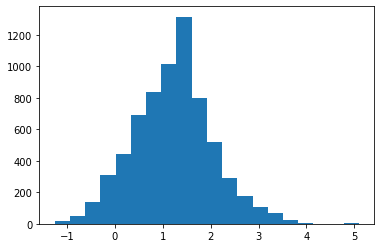

In [30]:
quakes = pd.read_csv('data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag, bins=20)

***Gridspec***

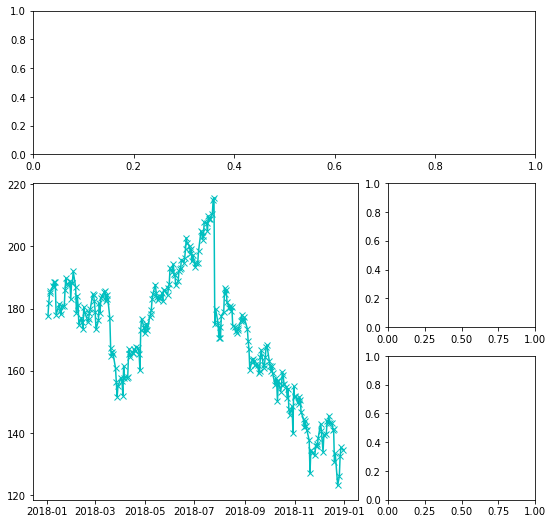

In [48]:
fig = plt.figure(figsize=(9,9))
gs = fig.add_gridspec(3,3)
top = fig.add_subplot(gs[0,:])
mid_left = fig.add_subplot(gs[1:,:2])
mid_left.plot(fb.index, fb.open, "x-c")
mid_right = fig.add_subplot(gs[1,2])
bottom_right = fig.add_subplot(gs[2,2])

# Task2
<hr>

In [49]:
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [51]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

In [79]:
new_cases_rolling_average.describe()

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
count,221.000000,188.000000,224.000000,181.000000,175.000000,170.000000,176.000000,184.000000,224.000000,166.000000,...,180.000000,166.000000,182.000000,181.000000,175.000000,229.000000,140.000000,156.000000,178.000000,176.000000
mean,175.348416,61.117021,216.313138,7.569850,19.561633,0.007563,0.530844,3022.743789,205.395408,18.499139,...,2.814286,7.190189,9.784929,266.296764,346.904490,4.588272,5.434694,12.909341,76.780096,42.888799
std,221.034216,52.136422,192.786729,8.627213,22.352703,0.035648,1.124225,3416.840513,195.307428,31.002191,...,7.109995,9.229023,5.394981,240.866601,398.173201,7.534072,14.291087,10.816722,87.840549,52.598791
min,0.000000,5.285714,0.000000,0.000000,0.000000,0.000000,0.000000,11.142857,0.000000,0.000000,...,0.000000,0.000000,0.285714,4.714286,2.428571,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.571429,15.500000,81.500000,0.428571,1.285714,0.000000,0.000000,139.857143,33.285714,0.000000,...,0.000000,0.285714,5.321429,54.142857,10.285714,0.428571,0.000000,5.214286,6.857143,1.142857
50%,63.857143,50.000000,155.714286,3.857143,6.571429,0.000000,0.142857,1353.571429,149.000000,0.428571,...,0.000000,1.714286,8.928571,160.571429,122.428571,1.571429,0.000000,10.285714,29.071429,15.071429
75%,263.857143,106.928571,381.785714,12.571429,33.428571,0.000000,0.571429,5620.500000,372.000000,34.571429,...,1.000000,10.714286,13.821429,504.000000,686.428571,5.142857,0.285714,20.035714,145.214286,80.178571
max,758.571429,159.857143,622.428571,33.857143,93.857143,0.285714,5.714286,11062.571429,648.428571,90.142857,...,28.714286,35.571429,23.142857,750.142857,1285.285714,36.857143,70.571429,52.142857,301.000000,208.571429


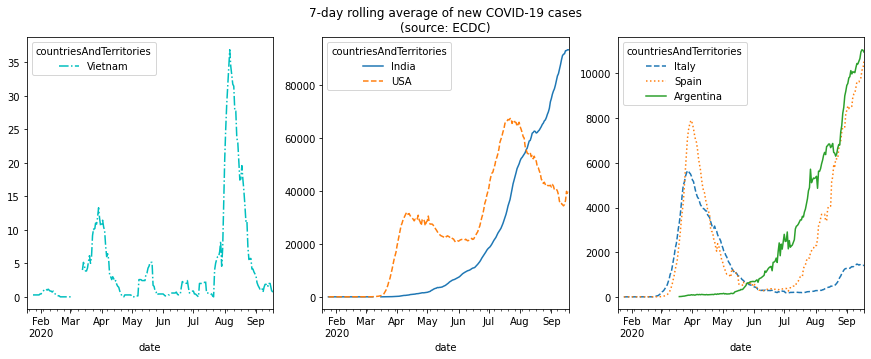

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['Vietnam']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['India', 'USA']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Italy', 'Spain', 'Argentina']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

kind='area'를 이용하여 면적그래프 그리기
면적그래프는 얇을 수록 수가 적음, 누적이 아님

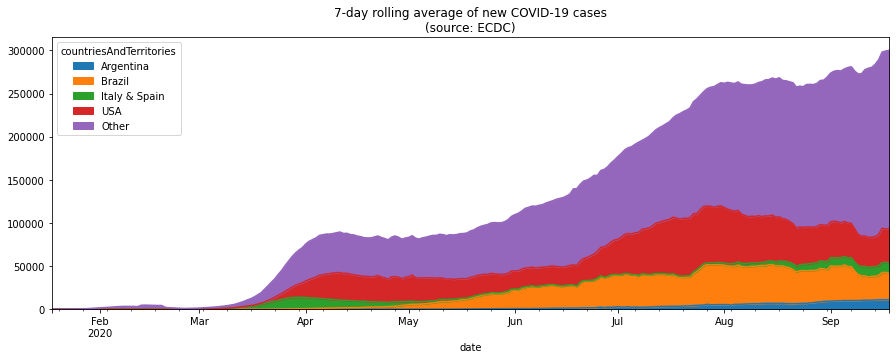

In [88]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'Argentina', 'Italy & Spain']
]
new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

# Task3
<hr>

Text(0, 0.5, 'count')

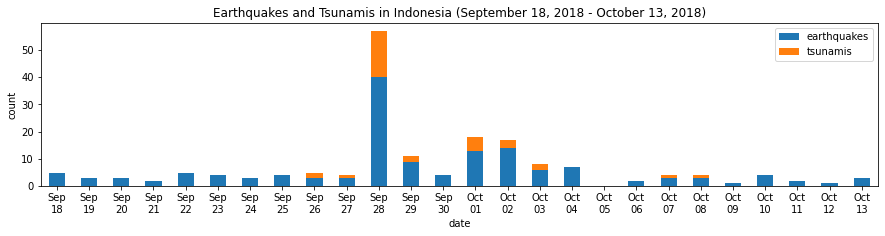

In [99]:
pivot = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
pivot.index = pivot.index.strftime('%b\n%d')

pivot.plot(
    stacked=True,
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15, 3), 
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

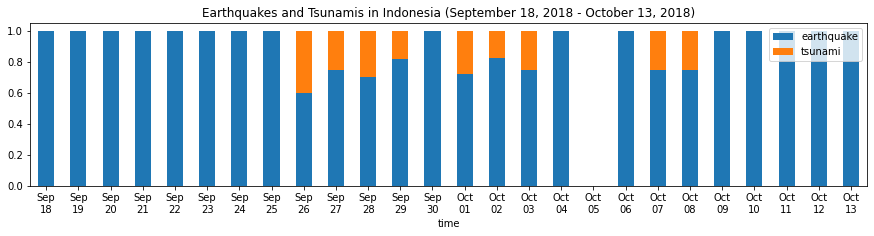

In [107]:
normalized_pivot = pivot.fillna(0).apply(lambda x: x / x.sum(), axis=1)

ax = normalized_pivot.plot.bar(
    y=['earthquake', 'tsunami'],
    stacked=True, rot=0, figsize=(15, 3),
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)